# ARCH/GARCH Model
### Formula for the shocks
$a_t = \sigma_t\epsilon_t$ \
$a_{t-1}^2 = (r_t - \mu_t)^2$

### Formula for the Variance
$\sigma^2_t = \omega + \alpha_1a^2_{t-1} + ... + \alpha_ma^2_{t-p} +\beta_1\sigma^2_{t-1} + ... +\beta_q\sigma^2_{t-q} = \omega + \sum_{i = 1}^p \alpha_ia^2_{t-i} + \sum_{i = 1}^q \beta_i\sigma^2_{t-i} $



## Imported Packages

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from arch import arch_model #GARCH Models
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import numpy as np
import math
from statistics import NormalDist
from scipy.stats import t
from datetime import datetime
from scipy.stats import shapiro #Shapiro Test
from scipy import stats #t-test
import statsmodels.api as sm #Ljung-Box Test


## Base Data

In [2]:
start_date = '2006-01-01' #yyyy-mm-dd
end_date = '2021-01-01'


#Philippines
PH = pd.read_csv('https://raw.githubusercontent.com/raphaelyt/thesis199.11/main/data/2006-2021/PSEi.csv')
PH['Date'] = pd.to_datetime(PH['Date'])
PH = PH.rename(columns={'Price': 'Close'})
PH = PH.replace(',','', regex=True)
PH['Close'] = PH['Close'].astype(float, errors = 'raise')
mask = (PH['Date'] >= start_date) & (PH['Date'] <= end_date)
PH = PH.loc[mask]
PH = PH.set_index('Date')
PH = PH.sort_index(axis=0, ascending = False)

#df.loc['2000-6-1':'2000-6-10']

#Malaysia
MY = pd.read_csv('https://raw.githubusercontent.com/raphaelyt/thesis199.11/main/data/2006-2021/%5EKLSE.csv')
MY['Date'] = pd.to_datetime(MY['Date'])
MY = MY.rename(columns={'Price': 'Close'})
MY = MY.replace(',','', regex=True)
MY['Close'] = MY['Close'].astype(float, errors = 'raise')
mask = (MY['Date'] >= start_date) & (MY['Date'] <= end_date)
MY = MY.loc[mask]
MY = MY.set_index('Date')
MY = MY.sort_index(axis=0, ascending = False)

#Signapore
SG = pd.read_csv('https://raw.githubusercontent.com/raphaelyt/thesis199.11/main/data/2006-2021/STI.csv')
SG['Date'] = pd.to_datetime(SG['Date'])
SG = SG.replace(',','', regex=True)
SG['Close'] = SG['Close'].astype(float, errors = 'raise')
mask = (SG['Date'] >= start_date) & (SG['Date'] <= end_date)
SG = SG.loc[mask]
SG= SG.set_index('Date')
SG = SG.sort_index(axis=0, ascending = False)

#Thailand
TH = pd.read_csv('https://raw.githubusercontent.com/raphaelyt/thesis199.11/main/data/2006-2021/SETi.csv')
TH['Date'] = pd.to_datetime(TH['Date'])
TH = TH.rename(columns={'Price': 'Close'})
TH = TH.replace(',','', regex=True)
TH['Close'] = TH['Close'].astype(float, errors = 'raise')
mask = (TH['Date'] >= start_date) & (TH['Date'] <= end_date)
TH = TH.loc[mask]
TH= TH.set_index('Date')
TH = TH.sort_index(axis=0, ascending = False)

#Vietnam
VT = pd.read_csv('https://raw.githubusercontent.com/raphaelyt/thesis199.11/main/data/2006-2021/HNX.csv')
VT['Date'] = pd.to_datetime(VT['Date'])
VT = VT.rename(columns={'Price': 'Close'})
VT = VT.replace(',','', regex=True)
VT['Close'] = VT['Close'].astype(float, errors = 'raise')
mask = (VT['Date'] >= start_date) & (VT['Date'] <= end_date)
VT = VT.loc[mask]
VT = VT.set_index('Date')
VT = VT.sort_index(axis=0, ascending = False)

In [3]:
def get_returns(df,d):
    df['Previous'] = df['Close'].shift(-d)
    df['Returns'] = np.log(df['Close']/df['Previous'])*100
    return df

PH = get_returns(PH, 1).dropna()
MY = get_returns(MY, 1).dropna()
SG = get_returns(SG, 1).dropna()
TH = get_returns(TH, 1).dropna()
VT = get_returns(VT, 1).dropna()

Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)


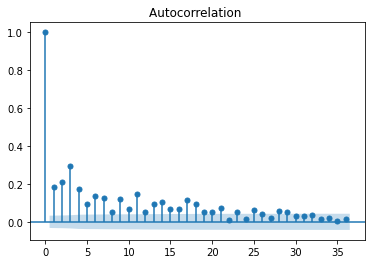

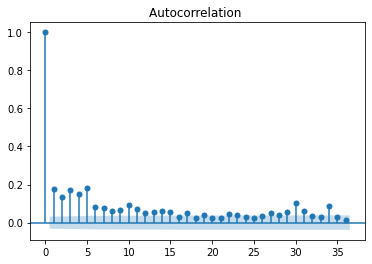

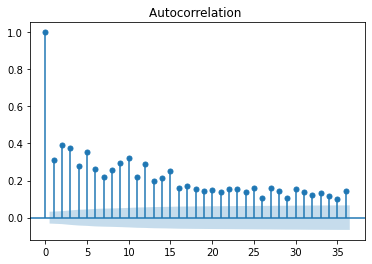

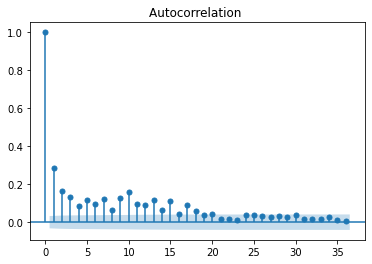

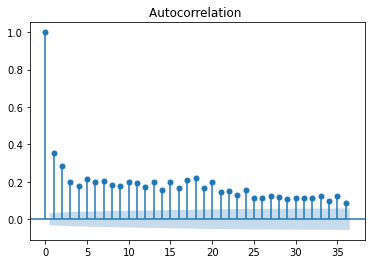

In [4]:
#Creating an ACF
def stock_ACF(df):
    return plot_acf(df['Returns']**2, lags = None, alpha = 0.05, title = 'Autocorrelation ', zero = True)

# PSEI_PS_ACF = stock_ACF(PSEI_PS)
# print(PSEI_PS_ACF)

print(stock_ACF(PH))
print(stock_ACF(MY))
print(stock_ACF(SG))
print(stock_ACF(TH))
print(stock_ACF(VT))

Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)
Figure(432x288)


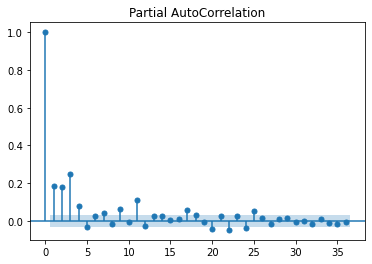

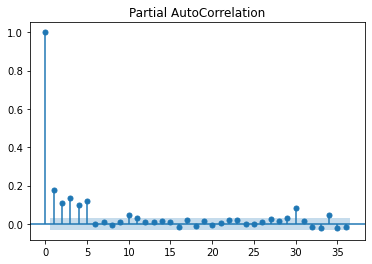

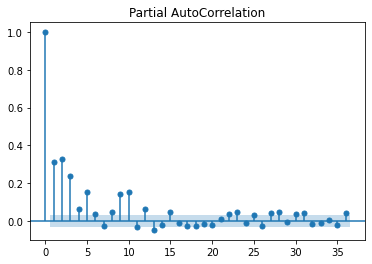

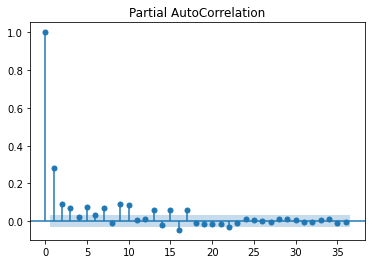

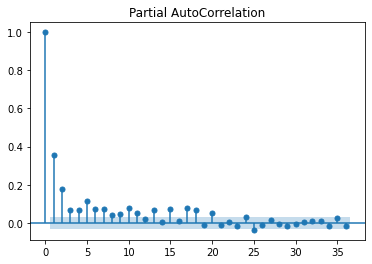

In [5]:
#Creating a PACF
def stock_PACF(df):
    return plot_pacf(df['Returns']**2, lags = None, alpha = 0.05, method = None,title = 'Partial AutoCorrelation',zero = True)

# PSEI_PS_PACF = stock_PACF(PSEI_PS)
# print(PSEI_PS_PACF)
print(stock_PACF(PH))
print(stock_PACF(MY))
print(stock_PACF(SG))
print(stock_PACF(TH))
print(stock_PACF(VT))

# Determining the order of the GARCH model

In [6]:
def fit_params(df, p = None, q = None):
    returns = df['Returns']
    model = arch_model(returns, p = p, q = q, rescale = False)
    fit = model.fit(disp = 'off')
    params = fit.params
    resid = fit.resid
    condv = fit.conditional_volatility
    return fit, params, resid, condv

PH_fit, PH_params, PH_resid, PH_condv = fit_params(PH, 1, 1)
MY_fit, MY_params, MY_resid, MY_condv = fit_params(MY, 1, 1)
SG_fit, SG_params, SG_resid, SG_condv = fit_params(SG, 1, 1)
TH_fit, TH_params, TH_resid, TH_condv = fit_params(TH, 1, 1)
VT_fit, VT_params, VT_resid, VT_condv = fit_params(VT, 1, 1)




In [7]:
VT_params

mu          0.055462
omega       0.036470
alpha[1]    0.192751
beta[1]     0.807249
Name: params, dtype: float64

In [8]:
#Conditional volatility
def sigma_c(df_1, df_2, model_param, p, q):
    omega = model_param[1]
    if p != None:
        i = 0
        alpha_lst = []
        while i < len(model_param) - (q+2):
            alpha = model_param[i+2]
            alpha_lst.append(alpha)
            i += 1
    if q != None:
        i = 0
        beta_lst = []
        while i < len(model_param) - (p+2):
            beta = model_param[i+2+p]
            beta_lst.append(beta)
            i += 1
    sigma = omega
    i = 0
    for alpha in alpha_lst:
        sigma += alpha*(df_1.iloc[i]**2)
        i += 1
    i = 0
    for beta in beta_lst:
        sigma += beta*(df_2.iloc[i]**2)
        i += 1
    return np.sqrt(sigma)


PH_sigma_c = sigma_c(PH_resid, PH_condv, PH_params, p = 1, q = 1)
MY_sigma_c = sigma_c(MY_resid, MY_condv, MY_params, p = 1, q = 1)
SG_sigma_c = sigma_c(SG_resid, SG_condv, SG_params, p = 1, q = 1)
TH_sigma_c = sigma_c(TH_resid, TH_condv, TH_params, p = 1, q = 1)
VT_sigma_c = sigma_c(VT_resid, VT_condv, VT_params, p = 1, q = 1)

In [12]:
def sigma_u(params):
    i = 0
    total = 0
    while i < len(params):
        if i == 0:
            mu = params[i]
        elif i == 1:
            omega = params[i]
        else:
            total += params[i]
        i += 1
    return np.sqrt(omega/(1-total))
        
PH_sigma_u = sigma_u(PH_params)
MY_sigma_u = sigma_u(MY_params)
SG_sigma_u = sigma_u(SG_params)
TH_sigma_u = sigma_u(TH_params)
VT_sigma_u = sigma_u(VT_params) #Problem with the modeling

<ipython-input-12-e5ae34a3f70b>:12: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(omega/(1-total))


## VaR using the volaitlity obtained from the GARCH model

## Computing for VaR
Formula: \
$(1-\alpha)\%VaR = \mu + \sigma t_M^{-1}(1-\alpha)$ _For small values of M_ \
$(1-\alpha)\%VaR = \mu + \sigma N^{-1}(1-\alpha)$ _For sufficient large values of M_ \

_Taken from : http://rstudio-pubs-static.s3.amazonaws.com/241528_8cb5ef038484439cb106f3ef883329ac.html_


In [13]:
def get_VaR_GARCH(df, alpha, sigma, dist):
    if dist == 'normal':
        VaR = sigma*NormalDist().inv_cdf(1-alpha) #t.ppf(1-alpha, len(df['Returns'])-1 )
    elif dist == 't':
        VaR = sigma*t.ppf(1-alpha, len(df['Returns'])-1 )
    return VaR

dist = 'normal'

#Philippines
PH_VaR_t = get_VaR_GARCH(PH, 0.05, PH_sigma_c, dist)
PH_VaR_u = get_VaR_GARCH(PH, 0.05, PH_sigma_u, dist)

#Malaysia
MY_VaR_t = get_VaR_GARCH(MY, 0.05, MY_sigma_c, dist)
MY_VaR_u = get_VaR_GARCH(MY, 0.05, MY_sigma_u, dist)

#Singapore
SG_VaR_t = get_VaR_GARCH(SG, 0.05, SG_sigma_c, dist)
SG_VaR_u = get_VaR_GARCH(SG, 0.05, SG_sigma_u, dist)


#Thailand
TH_VaR_t = get_VaR_GARCH(TH, 0.05, TH_sigma_c, dist)
TH_VaR_u = get_VaR_GARCH(TH, 0.05, TH_sigma_u, dist)

#Vietnam
VT_VaR_t = get_VaR_GARCH(VT, 0.05, VT_sigma_c, dist)
VT_VaR_u = get_VaR_GARCH(VT, 0.05, VT_sigma_u, dist)

# Forecasting VaR
## Fixed Window

In [19]:
def fixed_window(df, test_size, d, alpha, p, q, vol, dist):
    df = df[::-1]
    returns = df['Returns']
    sigma_lst = []
    date_df = df.iloc[:test_size]
    date_df = date_df.reset_index()
    date_df = date_df.filter(['Date'])
    for i in range(test_size):
        temp_df = returns[i:-(test_size-i)]
        model = arch_model(temp_df, p=p, q=q, vol = vol, rescale=None)
        fit = model.fit(disp='off')
        pred = fit.forecast(horizon=d, reindex = False)
        sigma_lst.append(np.sqrt(pred.variance.values[-1,:][0]))
    sigma_df = pd.Series(sigma_lst, index=returns.index[-test_size:])
    VaR_df = get_VaR_GARCH(df, alpha, sigma_df, dist)
    return sigma_df, VaR_df

dist = 'normal'
test_size = 365
vol = 'GARCH'

PH_sigma_df_g, PH_fw_df_g = fixed_window(PH, test_size,1, 0.05,1,1, vol, dist)
MY_sigma_df_g, MY_fw_df_g = fixed_window(MY, test_size,1, 0.05,1,1, vol, dist)
SG_sigma_df_g, SG_fw_df_g = fixed_window(SG, test_size,1, 0.05,1,1, vol, dist)
TH_sigma_df_g, TH_fw_df_g = fixed_window(TH, test_size,1, 0.05,1,1, vol, dist)
VT_sigma_df_g, VT_fw_df_g = fixed_window(VT, test_size,1, 0.05,1,1, vol, dist)

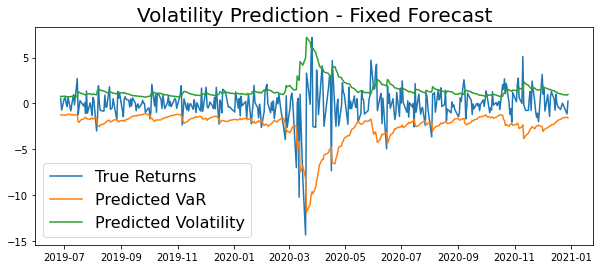

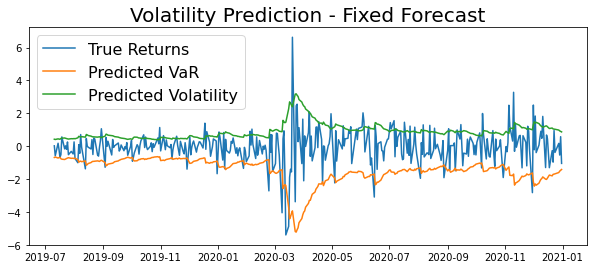

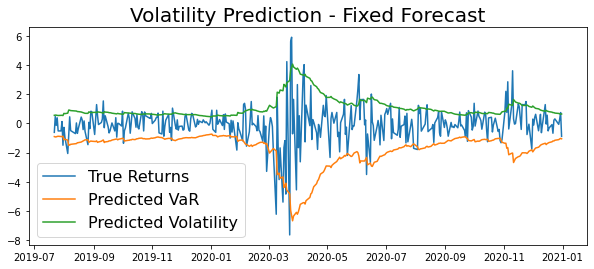

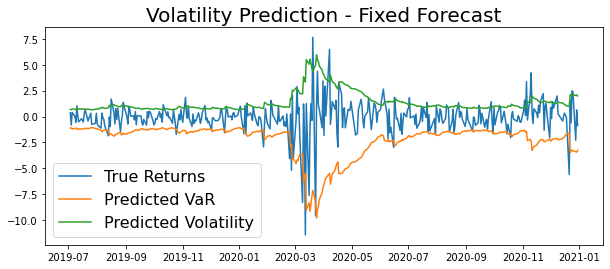

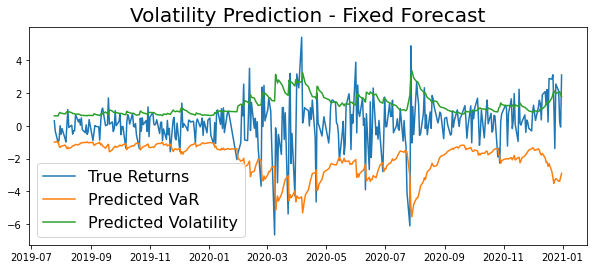

In [20]:
test_size = 365

#Philippines
plt.figure(figsize=(10,4))
plt.plot(PH['Returns'][:test_size])
plt.plot(-PH_fw_df_g)
plt.plot(PH_sigma_df_g)
plt.title('Volatility Prediction - Fixed Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted VaR', 'Predicted Volatility'], fontsize=16)

#Malaysia
plt.figure(figsize=(10,4))
plt.plot(MY['Returns'][:test_size])
plt.plot(-MY_fw_df_g)
plt.plot(MY_sigma_df_g)
plt.title('Volatility Prediction - Fixed Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted VaR', 'Predicted Volatility'], fontsize=16)

#Singapore
plt.figure(figsize=(10,4))
plt.plot(SG['Returns'][:test_size])
plt.plot(-SG_fw_df_g)
plt.plot(SG_sigma_df_g)
plt.title('Volatility Prediction - Fixed Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted VaR', 'Predicted Volatility'], fontsize=16)

#Thailand
plt.figure(figsize=(10,4))
plt.plot(TH['Returns'][:test_size])
plt.plot(-TH_fw_df_g)
plt.plot(TH_sigma_df_g)
plt.title('Volatility Prediction - Fixed Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted VaR', 'Predicted Volatility'], fontsize=16)

#Vietnam
plt.figure(figsize=(10,4))
plt.plot(VT['Returns'][:test_size])
plt.plot(-VT_fw_df_g)
plt.plot(VT_sigma_df_g)
plt.title('Volatility Prediction - Fixed Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted VaR', 'Predicted Volatility'], fontsize=16)

In [22]:
def char_function(df, window, test_size, name):
    '''
    The function returns the number of VaR violations.
    
    PARAMETERS
    ----------
    df : pandas.DataFrame
        The data frame contains data of a} chosen stock index 
        (Stock index must be arrange in DESCENDING ORDER by DATE)
        (Data frames must be the same size)
    window : pandas.DataFrame
        The data frame contains the estimated (1-alpha)% d-day VaR from 
        time t = test size to current using the rolling time window 
        (Data frames must be the same size)
        
    RETURNS
    -------
    N : int
        The value is the number of VaR violations
    '''
#     returns = abs(df['Returns'][:test_size].dropna())
    returns = df['Returns'][:test_size].dropna()
    f_returns = window.dropna()
    N = 0
    violation_lst = []
    for i, j in zip(returns, f_returns):
        if i > j:
            violation_lst.append(1)
            N += 1 
        else:
            violation_lst.append(0)
    violations = pd.Series(violation_lst, index = returns.index, name = name)
    df = df.join(violations)
    return df, N

entries = 365
#Philippines
PH, PH_N_fw_g = char_function(PH, PH_fw_df_g,entries, 'FW-G')

#Malaysia
MY, MY_N_fw_g = char_function(MY, MY_fw_df_g, entries, 'FW-G')

#Singapore
SG, SG_N_fw_g = char_function(SG, SG_fw_df_g, entries, 'FW-G')
    
#Thailand
TH, TH_N_fw_g = char_function(TH, TH_fw_df_g, entries, 'FW-G')

#Vietnam
VT, VT_N_fw_g = char_function(VT, VT_fw_df_g, entries, 'FW-G')

## Rolling Window

In [23]:
#PSEI_PS_F = PSEI_PS.sort_values('Date',ascending=True)
#PSEI_PS_F = PSEI_PS.set_index('Date')
#print(PSEI_PS)

def rolling_window(df, test_size, d, alpha, p, q, vol, dist):
    df = df[::-1]
    returns = df['Returns']
    sigma_lst = []
    date_df = df.iloc[:test_size]
    date_df = date_df.reset_index()
    date_df = date_df.filter(['Date'])
    for i in range(test_size):
        temp_df = returns[:-(test_size-i)]
        model = arch_model(temp_df, p=p, q=q, vol = vol , rescale=None)
        fit = model.fit(disp='off')
        pred = fit.forecast(horizon=d, reindex = False)
        sigma_lst.append(np.sqrt(pred.variance.values[-1,:][0]))
    sigma_df = pd.Series(sigma_lst, index=returns.index[-test_size:])
    VaR_df = get_VaR_GARCH(df, alpha, sigma_df, dist)
    return sigma_df, VaR_df

dist = 'normal'
vol = 'GARCH'
test_size = 365
PH_sigma_df_g, PH_rw_df_g = rolling_window(PH, test_size,1, 0.05,1,1, vol, dist)
MY_sigma_df_g, MY_rw_df_g = rolling_window(MY, test_size,1, 0.05,1,1, vol, dist)
SG_sigma_df_g, SG_rw_df_g = rolling_window(SG, test_size,1, 0.05,1,1, vol, dist)
TH_sigma_df_g, TH_rw_df_g = rolling_window(TH, test_size,1, 0.05,1,1, vol, dist)
VT_sigma_df_g, VT_rw_df_g = rolling_window(VT, test_size,1, 0.05,1,1, vol, dist)



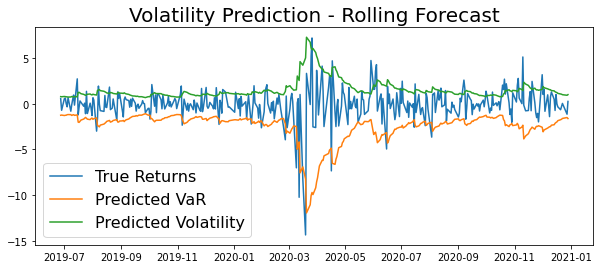

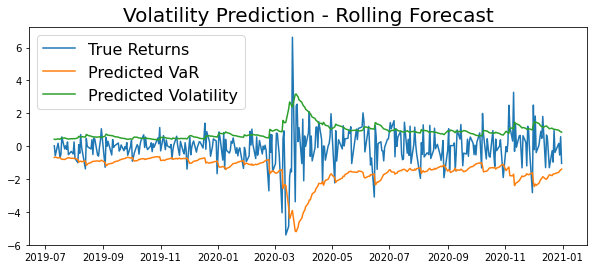

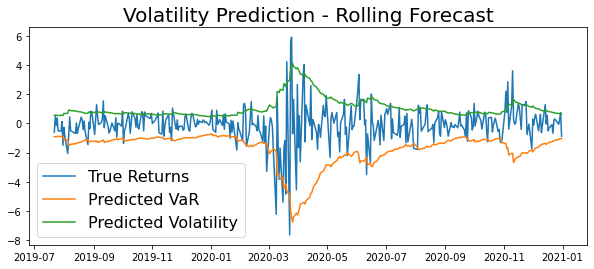

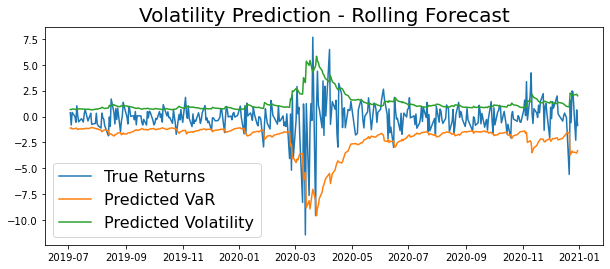

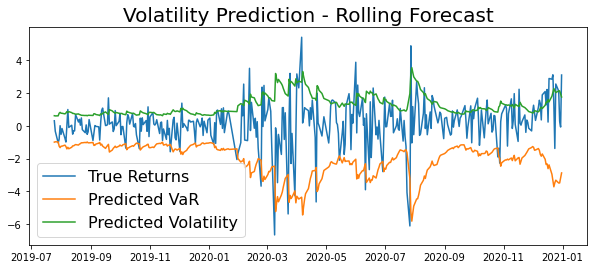

In [24]:
test_size = 365

#Philippines
plt.figure(figsize=(10,4))
plt.plot(PH['Returns'][:test_size])
plt.plot(-PH_rw_df_g)
plt.plot(PH_sigma_df_g)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted VaR', 'Predicted Volatility'], fontsize=16)

#Malaysia
plt.figure(figsize=(10,4))
plt.plot(MY['Returns'][:test_size])
plt.plot(-MY_rw_df_g)
plt.plot(MY_sigma_df_g)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted VaR', 'Predicted Volatility'], fontsize=16)

#Singapore
plt.figure(figsize=(10,4))
plt.plot(SG['Returns'][:test_size])
plt.plot(-SG_rw_df_g)
plt.plot(SG_sigma_df_g)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted VaR', 'Predicted Volatility'], fontsize=16)

#Thailand
plt.figure(figsize=(10,4))
plt.plot(TH['Returns'][:test_size])
plt.plot(-TH_rw_df_g)
plt.plot(TH_sigma_df_g)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted VaR', 'Predicted Volatility'], fontsize=16)

#Vietnam
plt.figure(figsize=(10,4))
plt.plot(VT['Returns'][:test_size])
plt.plot(-VT_rw_df_g)
plt.plot(VT_sigma_df_g)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted VaR', 'Predicted Volatility'], fontsize=16)

In [ ]:
# #Absolute Returns

# test_size = 365

# #Philippines
# plt.figure(figsize=(10,4))
# plt.plot(abs(PH['Returns'][:test_size]*100))
# plt.plot(-PH_rw_df)
# plt.plot(PH_sigma_df)
# plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
# plt.legend(['True Returns', 'Predicted VaR', 'Predicted Volatility'], fontsize=16)

# #Malaysia
# plt.figure(figsize=(10,4))
# plt.plot(abs(MY['Returns'][:test_size]*100))
# plt.plot(-MY_rw_df)
# plt.plot(MY_sigma_df)
# plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
# plt.legend(['True Returns', 'Predicted VaR', 'Predicted Volatility'], fontsize=16)

# #Singapore
# plt.figure(figsize=(10,4))
# plt.plot(abs(SG['Returns'][:test_size]*100))
# plt.plot(-SG_rw_df)
# plt.plot(SG_sigma_df)
# plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
# plt.legend(['True Returns', 'Predicted VaR', 'Predicted Volatility'], fontsize=16)

# #Thailand
# plt.figure(figsize=(10,4))
# plt.plot(abs(TH['Returns'][:test_size]*100))
# plt.plot(-TH_rw_df)
# plt.plot(TH_sigma_df)
# plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
# plt.legend(['True Returns', 'Predicted VaR', 'Predicted Volatility'], fontsize=16)

# #Vietnam
# plt.figure(figsize=(10,4))
# plt.plot(abs(VT['Returns'][:test_size]*100))
# plt.plot(-VT_rw_df)
# plt.plot(VT_sigma_df)
# plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
# plt.legend(['True Returns', 'Predicted VaR', 'Predicted Volatility'], fontsize=16)

In [26]:
entries = 365
#Philippines
PH, PH_N_rw_g = char_function(PH, PH_rw_df_g,entries, 'RW-G')

#Malaysia
MY, MY_N_rw_g = char_function(MY, MY_rw_df_g, entries, 'RW-G')

#Singapore
SG, SG_N_rw_g = char_function(SG, SG_rw_df_g, entries, 'RW-G')
    
#Thailand
TH, TH_N_rw_g = char_function(TH, TH_rw_df_g, entries, 'RW-G')

#Vietnam
VT, VT_N_rw_g = char_function(VT, VT_rw_df_g, entries, 'RW-G')

# Exponential GARCH

## Fixed Window

In [27]:
dist = 'normal'
test_size = 365
vol = 'EGARCH'

PH_sigma_df_e, PH_fw_df_e = fixed_window(PH, test_size,1, 0.05,1,1, vol, dist)
MY_sigma_df_e, MY_fw_df_e = fixed_window(MY, test_size,1, 0.05,1,1, vol, dist)
SG_sigma_df_e, SG_fw_df_e = fixed_window(SG, test_size,1, 0.05,1,1, vol, dist)
TH_sigma_df_e, TH_fw_df_e = fixed_window(TH, test_size,1, 0.05,1,1, vol, dist)
VT_sigma_df_e, VT_fw_df_e = fixed_window(VT, test_size,1, 0.05,1,1, vol, dist)

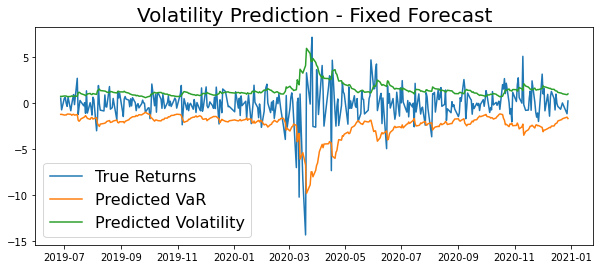

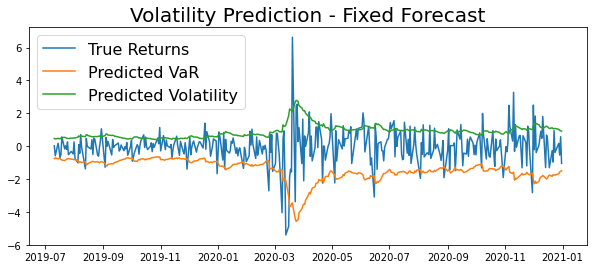

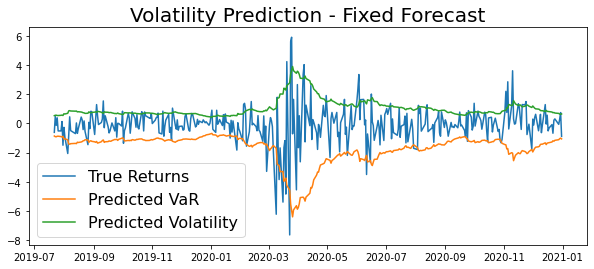

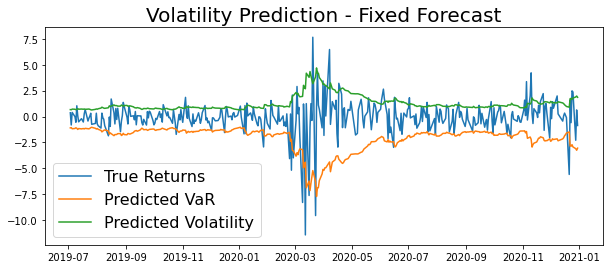

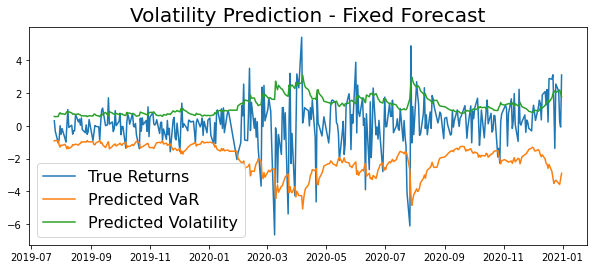

In [28]:
test_size = 365

#Philippines
plt.figure(figsize=(10,4))
plt.plot(PH['Returns'][:test_size])
plt.plot(-PH_fw_df_e)
plt.plot(PH_sigma_df_e)
plt.title('Volatility Prediction - Fixed Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted VaR', 'Predicted Volatility'], fontsize=16)

#Malaysia
plt.figure(figsize=(10,4))
plt.plot(MY['Returns'][:test_size])
plt.plot(-MY_fw_df_e)
plt.plot(MY_sigma_df_e)
plt.title('Volatility Prediction - Fixed Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted VaR', 'Predicted Volatility'], fontsize=16)

#Singapore
plt.figure(figsize=(10,4))
plt.plot(SG['Returns'][:test_size])
plt.plot(-SG_fw_df_e)
plt.plot(SG_sigma_df_e)
plt.title('Volatility Prediction - Fixed Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted VaR', 'Predicted Volatility'], fontsize=16)

#Thailand
plt.figure(figsize=(10,4))
plt.plot(TH['Returns'][:test_size])
plt.plot(-TH_fw_df_e)
plt.plot(TH_sigma_df_e)
plt.title('Volatility Prediction - Fixed Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted VaR', 'Predicted Volatility'], fontsize=16)

#Vietnam
plt.figure(figsize=(10,4))
plt.plot(VT['Returns'][:test_size])
plt.plot(-VT_fw_df_e)
plt.plot(VT_sigma_df_e)
plt.title('Volatility Prediction - Fixed Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted VaR', 'Predicted Volatility'], fontsize=16)

In [29]:
entries = 365
#Philippines
PH, PH_N_fw_e = char_function(PH, PH_fw_df_e,entries, 'FW-E')

#Malaysia
MY, MY_N_fw_e = char_function(MY, MY_fw_df_e, entries, 'FW-E')

#Singapore
SG, SG_N_fw_e = char_function(SG, SG_fw_df_e, entries, 'FW-E')
    
#Thailand
TH, TH_N_fw_e = char_function(TH, TH_fw_df_e, entries, 'FW-E')

#Vietnam
VT, VT_N_fw_e = char_function(VT, VT_fw_df_e, entries, 'FW-E')

## Rolling Window

In [30]:
dist = 'normal'
vol = 'EGARCH'
test_size = 365
PH_sigma_df_e, PH_rw_df_e = rolling_window(PH, test_size,1, 0.05,1,1, vol, dist)
MY_sigma_df_e, MY_rw_df_e = rolling_window(MY, test_size,1, 0.05,1,1, vol, dist)
SG_sigma_df_e, SG_rw_df_e = rolling_window(SG, test_size,1, 0.05,1,1, vol, dist)
TH_sigma_df_e, TH_rw_df_e = rolling_window(TH, test_size,1, 0.05,1,1, vol, dist)
VT_sigma_df_e, VT_rw_df_e = rolling_window(VT, test_size,1, 0.05,1,1, vol, dist)

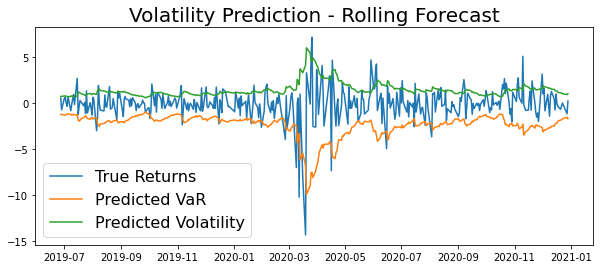

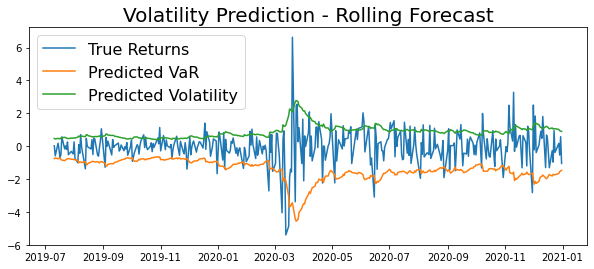

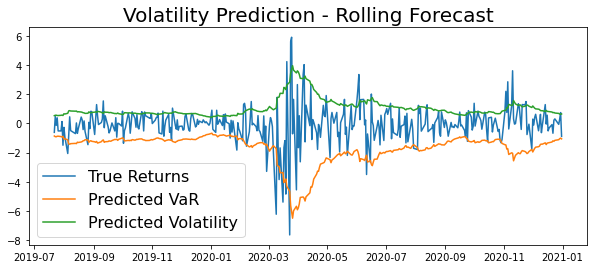

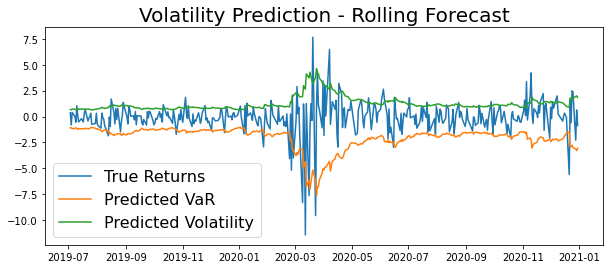

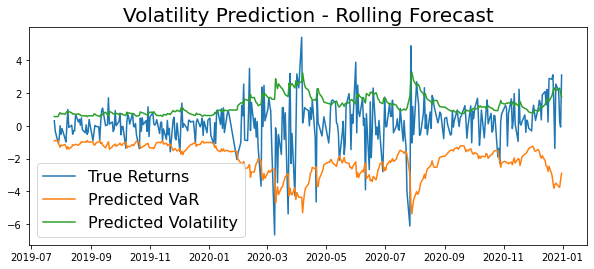

In [31]:
test_size = 365

#Philippines
plt.figure(figsize=(10,4))
plt.plot(PH['Returns'][:test_size])
plt.plot(-PH_rw_df_e)
plt.plot(PH_sigma_df_e)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted VaR', 'Predicted Volatility'], fontsize=16)

#Malaysia
plt.figure(figsize=(10,4))
plt.plot(MY['Returns'][:test_size])
plt.plot(-MY_rw_df_e)
plt.plot(MY_sigma_df_e)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted VaR', 'Predicted Volatility'], fontsize=16)

#Singapore
plt.figure(figsize=(10,4))
plt.plot(SG['Returns'][:test_size])
plt.plot(-SG_rw_df_e)
plt.plot(SG_sigma_df_e)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted VaR', 'Predicted Volatility'], fontsize=16)

#Thailand
plt.figure(figsize=(10,4))
plt.plot(TH['Returns'][:test_size])
plt.plot(-TH_rw_df_e)
plt.plot(TH_sigma_df_e)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted VaR', 'Predicted Volatility'], fontsize=16)

#Vietnam
plt.figure(figsize=(10,4))
plt.plot(VT['Returns'][:test_size])
plt.plot(-VT_rw_df_e)
plt.plot(VT_sigma_df_e)
plt.title('Volatility Prediction - Rolling Forecast', fontsize=20)
plt.legend(['True Returns', 'Predicted VaR', 'Predicted Volatility'], fontsize=16)

In [32]:
entries = 365
#Philippines
PH, PH_N_rw_e = char_function(PH, PH_rw_df_e,entries, 'RW-E')

#Malaysia
MY, MY_N_rw_e = char_function(MY, MY_rw_df_e, entries, 'RW-E')

#Singapore
SG, SG_N_rw_e = char_function(SG, SG_rw_df_e, entries, 'RW-E')
    
#Thailand
TH, TH_N_rw_e = char_function(TH, TH_rw_df_e, entries, 'RW-E')

#Vietnam
VT, VT_N_rw_e = char_function(VT, VT_rw_df_e, entries, 'RW-E')

# Last GARCH model
### Options
1. FIGARCH (Fractionally Integrated GARCH) http://boutaharf.free.fr/articles/StatisticalMethodsApplictionABT2010.pdf


# Backtesting
## Sources
1. https://www.mathworks.com/help/risk/overview-of-var-backtesting.html#bu_mbwo-1

In [ ]:
def CI_kupiec(alpha, ss):
    '''
    The function returns an (1-alpha)% confidence interval for N
    
    PARAMETERS
    ----------
    alpha : float 
        The level of significance of the VaR
        (Assumes a value in between 0 and 1)
    ss : int
        The total number of entries in the data frame of the asset
        
    RETURNS
    -------
    CI : list
        The list is the (1-alpha)% confidence interval
    '''
    CI = []
    a = np.ceil(alpha*ss - (NormalDist().inv_cdf(1-alpha/2))*np.sqrt(ss*alpha*(1-alpha)))
    b = np.ceil(alpha*ss + (NormalDist().inv_cdf(1-alpha/2))*np.sqrt(ss*alpha*(1-alpha)))
    CI.append(a)
    CI.append(b)
    return CI

CI_kupiec(0.05,365)

In [34]:
def LR_kupiec(N, observations, alpha):
    p = alpha
    return -2*np.log((((1-p)**(observations - N))*(p**N))/(((1-N/observations)**(observations - N))*((N/observations)**N)))

alpha = 0.05 
entries = 365
#Philippines
PH_LRk_fw_g = LR_kupiec(PH_N_fw_g,entries, alpha)
PH_LRk_rw_g = LR_kupiec(PH_N_rw_g,entries, alpha)
PH_LRk_fw_e = LR_kupiec(PH_N_fw_e, entries, alpha)
PH_LRk_rw_e = LR_kupiec(PH_N_rw_e, entries, alpha)
# PH_LRk_fw_brw = LR_kupiec(PH_N_fw_brw, entries, alpha)
# PH_LRk_rw_brw = LR_kupiec(PH_N_rw_brw, entries, alpha)

#Malaysia
MY_LRk_fw_g = LR_kupiec(MY_N_fw_g, entries, alpha)
MY_LRk_rw_g = LR_kupiec(MY_N_rw_g, entries, alpha)
MY_LRk_fw_e = LR_kupiec(MY_N_fw_e, entries, alpha)
MY_LRk_rw_e = LR_kupiec(MY_N_rw_e, entries, alpha)
# MY_LRk_fw_brw = LR_kupiec(MY_N_fw_brw, entries, alpha)
# MY_LRk_rw_brw = LR_kupiec(MY_N_rw_brw, entries, alpha)

#Singapore
SG_LRk_fw_g = LR_kupiec(SG_N_fw_g, entries, alpha)
SG_LRk_rw_g = LR_kupiec(SG_N_rw_g, entries, alpha)
SG_LRk_fw_e = LR_kupiec(SG_N_fw_e, entries, alpha)
SG_LRk_rw_e = LR_kupiec(SG_N_rw_e, entries, alpha)
# SG_LRk_fw_brw = LR_kupiec(SG_N_fw_brw, entries, alpha)
# SG_LRk_rw_brw = LR_kupiec(SG_N_rw_brw, entries, alpha)

#Thailand
TH_LRk_fw_g = LR_kupiec(TH_N_fw_g, entries, alpha)
TH_LRk_rw_g = LR_kupiec(TH_N_rw_g, entries, alpha)
TH_LRk_fw_e = LR_kupiec(TH_N_fw_e, entries, alpha)
TH_LRk_rw_e = LR_kupiec(TH_N_rw_e, entries, alpha)
# TH_LRk_fw_brw = LR_kupiec(TH_N_fw_brw, entries, alpha)
# TH_LRk_rw_brw = LR_kupiec(TH_N_rw_brw, entries, alpha)

#Vietnam
VT_LRk_fw_g = LR_kupiec(VT_N_fw_g, entries, alpha)
VT_LRk_rw_g = LR_kupiec(VT_N_rw_g, entries, alpha)
VT_LRk_fw_e = LR_kupiec(VT_N_fw_e, entries, alpha)
VT_LRk_rw_e = LR_kupiec(VT_N_rw_e, entries, alpha)
# VT_LRk_fw_brw = LR_kupiec(VT_N_fw_brw, entries, alpha)
# VT_LRk_rw_brw = LR_kupiec(VT_N_rw_brw, entries, alpha)

In [35]:
def no_of_periods(df, name):
    n00 = 0
    n01 = 0
    n10 = 0
    n11 = 0
    violations = df[name].dropna()[::-1]
    v_p = violations[0]
    i = 1
    while i < len(violations):
        if v_p == violations[i] and v_p == 0:
            n00 += 1
        elif v_p != violations[i] and v_p == 0:
            n01 += 1
        elif v_p != violations[i] and v_p == 1:
            n10 += 1
        else:
            n11 += 1
        v_p = violations[i]
        i += 1 
    return n00, n01, n10, n11

#Philippines
PH_n00_fw_g, PH_n01_fw_g, PH_n10_fw_g, PH_n11_fw_g = no_of_periods(PH, 'FW-G')
PH_n00_rw_g, PH_n01_rw_g, PH_n10_rw_g, PH_n11_rw_g = no_of_periods(PH, 'RW-G')
PH_n00_fw_e, PH_n01_fw_e, PH_n10_fw_e, PH_n11_fw_e = no_of_periods(PH, 'FW-E')
PH_n00_rw_e, PH_n01_rw_e, PH_n10_rw_e, PH_n11_rw_e = no_of_periods(PH, 'RW-E')
# PH_n00_fw_brw, PH_n01_fw_brw, PH_n10_fw_brw, PH_n11_fw_brw = no_of_periods(PH, 'FW-BRW')
# PH_n00_rw_brw, PH_n01_rw_brw, PH_n10_rw_brw, PH_n11_rw_brw = no_of_periods(PH, 'RW-BRW')

#Malaysia
MY_n00_fw_g, MY_n01_fw_g, MY_n10_fw_g, MY_n11_fw_g = no_of_periods(MY, 'FW-G')
MY_n00_rw_g, MY_n01_rw_g, MY_n10_rw_g, MY_n11_rw_g = no_of_periods(MY, 'RW-G')
MY_n00_fw_e, MY_n01_fw_e, MY_n10_fw_e, MY_n11_fw_e = no_of_periods(MY, 'FW-E')
MY_n00_rw_e, MY_n01_rw_e, MY_n10_rw_e, MY_n11_rw_e = no_of_periods(MY, 'RW-E')
# MY_n00_fw_brw, MY_n01_fw_brw, MY_n10_fw_brw, MY_n11_fw_brw = no_of_periods(MY, 'FW-BRW')
# MY_n00_rw_brw, MY_n01_rw_brw, MY_n10_rw_brw, MY_n11_rw_brw = no_of_periods(MY, 'RW-BRW')

#Singapore
SG_n00_fw_g, SG_n01_fw_g, SG_n10_fw_g, SG_n11_fw_g = no_of_periods(SG, 'FW-G')
SG_n00_rw_g, SG_n01_rw_g, SG_n10_rw_g, SG_n11_rw_g = no_of_periods(SG, 'RW-G')
SG_n00_fw_e, SG_n01_fw_e, SG_n10_fw_e, SG_n11_fw_e = no_of_periods(SG, 'FW-E')
SG_n00_rw_e, SG_n01_rw_e, SG_n10_rw_e, SG_n11_rw_e = no_of_periods(SG, 'RW-E')
# SG_n00_fw_brw, SG_n01_fw_brw, SG_n10_fw_brw, SG_n11_fw_brw = no_of_periods(SG, 'FW-BRW')
# SG_n00_rw_brw, SG_n01_rw_brw, SG_n10_rw_brw, SG_n11_rw_brw = no_of_periods(SG, 'RW-BRW')

#Thailand
TH_n00_fw_g, TH_n01_fw_g, TH_n10_fw_g, TH_n11_fw_g = no_of_periods(TH, 'FW-G')
TH_n00_rw_g, TH_n01_rw_g, TH_n10_rw_g, TH_n11_rw_g = no_of_periods(TH, 'RW-G')
TH_n00_fw_e, TH_n01_fw_e, TH_n10_fw_e, TH_n11_fw_e = no_of_periods(TH, 'FW-E')
TH_n00_rw_e, TH_n01_rw_e, TH_n10_rw_e, TH_n11_rw_e = no_of_periods(TH, 'RW-E')
# TH_n00_fw_brw, TH_n01_fw_brw, TH_n10_fw_brw, TH_n11_fw_brw = no_of_periods(TH, 'FW-BRW')
# TH_n00_rw_brw, TH_n01_rw_brw, TH_n10_rw_brw, TH_n11_rw_brw = no_of_periods(TH, 'RW-BRW')

#Vietnam
VT_n00_fw_g, VT_n01_fw_g, VT_n10_fw_g, VT_n11_fw_g = no_of_periods(VT, 'FW-G')
VT_n00_rw_g, VT_n01_rw_g, VT_n10_rw_g, VT_n11_rw_g = no_of_periods(VT, 'RW-G')
VT_n00_fw_e, VT_n01_fw_e, VT_n10_fw_e, VT_n11_fw_e = no_of_periods(VT, 'FW-E')
VT_n00_rw_e, VT_n01_rw_e, VT_n10_rw_e, VT_n11_rw_e = no_of_periods(VT, 'RW-E')
# VT_n00_fw_brw, VT_n01_fw_brw, VT_n10_fw_brw, VT_n11_fw_brw = no_of_periods(VT, 'FW-BRW')
# VT_n00_rw_brw, VT_n01_rw_brw, VT_n10_rw_brw, VT_n11_rw_brw = no_of_periods(VT, 'RW-BRW')

In [36]:
def LR_ind(df, name, LR_pof):
    n00, n01, n10, n11 = no_of_periods(df, name)
    pi_0 = n01/(n00+n01)
    pi_1 = n11/(n10+n11)
    pi = (n01+n11)/(n00+n01+n10+n11)
    LR_ind = -2*np.log((((1-pi)**(n00+n01))*(pi**(n01+n11)))/(((1-pi_0)**n00)*(pi_0**n01)*((1-pi_1)**n10)*(pi_1**n11)))
    LR_cc = LR_ind+LR_pof
    return LR_ind, LR_cc

#Philippines
PH_LRcci_fw_g, PH_LRcc_fw_g = LR_ind(PH, 'FW-G', PH_LRk_fw_g)
PH_LRcci_rw_g, PH_LRcc_rw_g = LR_ind(PH, 'RW-G', PH_LRk_rw_g)
PH_LRcci_fw_e, PH_LRcc_fw_e = LR_ind(PH, 'FW-E', PH_LRk_fw_e)
PH_LRcci_rw_e, PH_LRcc_rw_e  = LR_ind(PH, 'RW-E', PH_LRk_rw_e)
# PH_LRcci_fw_brw, PH_LRcc_fw_brw = LR_ind(PH, 'FW-BRW', PH_LRk_fw_brw)
# PH_LRcci_rw_brw, PH_LRcc_rw_brw = LR_ind(PH, 'RW-BRW', PH_LRk_rw_brw)

#Malaysia
MY_LRcci_fw_g, MY_LRcc_fw_g = LR_ind(MY, 'FW-G', MY_LRk_fw_g)
MY_LRcci_rw_g, MY_LRcc_rw_g = LR_ind(MY, 'RW-G', MY_LRk_rw_g)
MY_LRcci_fw_e, MY_LRcc_fw_e = LR_ind(MY, 'FW-E', MY_LRk_fw_g)
MY_LRcci_rw_e, MY_LRcc_rw_e = LR_ind(MY, 'RW-E', MY_LRk_rw_g)
# MY_LRcci_fw_brw, MY_LRcc_fw_brw = LR_ind(MY, 'FW-BRW', MY_LRk_fw_brw)
# MY_LRcci_rw_brw, MY_LRcc_rw_brw = LR_ind(MY, 'RW-BRW', MY_LRk_rw_brw)

#Singapore
SG_LRcci_fw_g,SG_LRcc_fw_g = LR_ind(SG, 'FW-G', SG_LRk_fw_g)
SG_LRcci_rw_g,SG_LRcc_rw_g = LR_ind(SG, 'RW-G', SG_LRk_rw_g)
SG_LRcci_fw_e,SG_LRcc_fw_e = LR_ind(SG, 'FW-E', SG_LRk_fw_e)
SG_LRcci_rw_e,SG_LRcc_rw_e = LR_ind(SG, 'RW-E', SG_LRk_rw_e)
# SG_LRcci_fw_brw,SG_LRcc_fw_brw = LR_ind(SG, 'FW-BRW', SG_LRk_fw_brw)
# SG_LRcci_rw_brw,SG_LRcc_rw_brw = LR_ind(SG, 'RW-BRW', SG_LRk_rw_brw)

#Thailand
TH_LRcci_fw_g,TH_LRcc_fw_g = LR_ind(TH, 'FW-G', TH_LRk_fw_g)
TH_LRcci_rw_g,TH_LRcc_rw_g = LR_ind(TH, 'RW-G', TH_LRk_rw_g)
TH_LRcci_fw_e,TH_LRcc_fw_e = LR_ind(TH, 'FW-E', TH_LRk_fw_e)
TH_LRcci_rw_e,TH_LRcc_rw_e = LR_ind(TH, 'RW-E', TH_LRk_rw_e)
# TH_LRcci_fw_brw,TH_LRcc_fw_brw = LR_ind(TH, 'FW-BRW', TH_LRk_fw_brw)
# TH_LRcci_rw_brw,TH_LRcc_rw_brw = LR_ind(TH, 'RW-BRW', TH_LRk_rw_brw)

#Vietnam
VT_LRcci_fw_g,VT_LRcc_fw_g = LR_ind(VT, 'FW-G', VT_LRk_fw_g)
VT_LRcci_rw_g,VT_LRcc_rw_g = LR_ind(VT, 'RW-G', VT_LRk_rw_g)
VT_LRcci_fw_e,VT_LRcc_fw_e = LR_ind(VT, 'FW-E', VT_LRk_fw_e)
VT_LRcci_rw_e,VT_LRcc_rw_e = LR_ind(VT, 'RW-E', VT_LRk_rw_e)
# VT_LRcci_fw_brw,VT_LRcc_fw_brw = LR_ind(VT, 'FW-BRW', v_LRk_fw_brw)
# VT_LRcci_rw_brw,VT_LRcc_rw_brw = LR_ind(VT, 'RW-BRW', VT_LRk_rw_brw)

# Dump Code

In [ ]:
# PH['Returns'][1:]

In [ ]:
# PSEI_PS.index.inferred_type == "datetime64"
# PSEI_PS.index = pd.to_datetime(PSEI_PS.index)
# plt.figure(figsize=(10,5))
# plt.plot(PSEI_PS['Returns'])
# plt.ylabel('Log Returns', fontsize=16)
# plt.title('PSEI.PS Returns', fontsize=20)


In [ ]:
# def residuals_function(df, d = 1):
#     mu_lst = []
#     df = df.reset_index()
#     for i in range(len(df['Returns'])-d):
#         mu = np.nansum(df['Returns'].iloc[i:])/len(df['Returns'].iloc[i:])
#         mu_lst.append(mu)
#     mu_df= pd.DataFrame(mu_lst, columns = ['Mu'])
#     mu_df = mu_df.iloc[:-d]
#     df = pd.merge(df, mu_df, left_index = True, right_index = True)
#     df['Residuals'] = df['Returns'] - df['Mu']
#     display(df)
#     return df
# PSEI_PS = residuals_function(PSEI_PS, d = 1)


In [ ]:
# PSEI_PS = PSEI_PS.set_index('Date')
# plt.plot(PSEI_PS['Residuals'])
# plt.ylabel('Log Return', fontsize=16)
# plt.title('PSEI.PS Residuals', fontsize=20)

In [ ]:
# df = PSEI_PS_resid*100 
# test_size =247
# d = 1 

# sigma_lst = []
# for i in range(len(df)-test_size):
#     temp_df = df[-(test_size+i):-(i+1)]
#     model = arch_model(temp_df, p=1, q=2, rescale=False)
#     model_fit = model.fit(disp='off')
#     pred = model_fit.forecast(horizon=d, reindex = False).variance
#     sigma_lst.append(np.sqrt(pred.values[0,0]))
# sigma_lst = sigma_lst[::-1]
# sigma_lst*PSEI_PS_params[0]

In [ ]:
# a = NormalDist().inv_cdf(1-0.05)
# type(a)

In [ ]:
# a*np.array(sigma_lst) +PSEI_PS_mean.iloc[:-247]*100

In [ ]:
# test_size = 971
# alpha = 0.05

# PH_1 = PH[::-1]
# returns = PH_1['Returns']
# sigma_lst = []
# date_df = PH_1.iloc[:test_size]
# date_df = date_df.reset_index()
# date_df = date_df.filter(['Date'])
# for i in range(test_size):
#     df = PH_1['Returns'][:-test_size+i]
#     model = arch_model(df, p = 1, q = 1, rescale = False)
#     model_fit = model.fit(disp='off')
#     pred = model_fit.forecast(horizon=1, reindex = False)
#     sigma_lst.append(np.sqrt(pred.variance.values[-1,:][0]))
# sigma_df = pd.Series(sigma_lst, index=returns.index[-test_size:])
# VaR_df = -NormalDist().inv_cdf(1-alpha)*sigma_df

In [ ]:
# for i in range(test_size):
#     train = returns[:-(test_size-i)]
#     model = arch_model(train, p=1, q=2)
#     model_fit = model.fit(disp='off')
#     pred = model_fit.forecast(horizon=1, reindex = False)
#     rolling_predictions.append(np.sqrt(pred.variance.values[-1,:][0]))

In [ ]:
# df = PSEI_PS_resid
# rw_df = pd.DataFrame(rw_df, columns = ['Forecasted VaR'])
# date_df = df.iloc[:-test_size]
# date_df = date_df.reset_index()
# date_df = date_df.filter(['Date'])
# rw_df = pd.merge(date_df, rw_df, left_index = True, right_index = True).set_index(['Date'])